## Audio Classification using Machine Learning

In [1]:
!pip install librosa

  Obtaining dependency information for librosa from https://files.pythonhosted.org/packages/8c/8a/2d231b35456506b7c98b3ab9bbf07917b205fed8615d2e59e976ab497fff/librosa-0.10.2.post1-py3-none-any.whl.metadata
  Obtaining dependency information for audioread>=2.1.9 from https://files.pythonhosted.org/packages/57/8d/30aa32745af16af0a9a650115fbe81bde7c610ed5c21b381fca0196f3a7f/audioread-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for soundfile>=0.12.1 from https://files.pythonhosted.org/packages/03/69/eda7a076709ada14a11604347ea3b80b3888101c93bbc739071d2f553df5/soundfile-0.13.0-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for pooch>=1.1 from https://files.pythonhosted.org/packages/a8/87/77cc11c7a9ea9fd05503def69e3d18605852cd0d4b0d3b8f15bbeb3ef1d1/pooch-1.8.2-py3-none-any.whl.metadata
  Obtaining dependency information for soxr>=0.3.2 from https://files.pythonhosted.org/packages/86/94/6a7e91bea7e6ca193ee429869b8f18548cd79759e064021ecb5756024c7c

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
import IPython.display as ipd
import librosa
import librosa.display

In [6]:
filename='UrbanSound8K/audio/fold1/7061-6-0-0.wav'

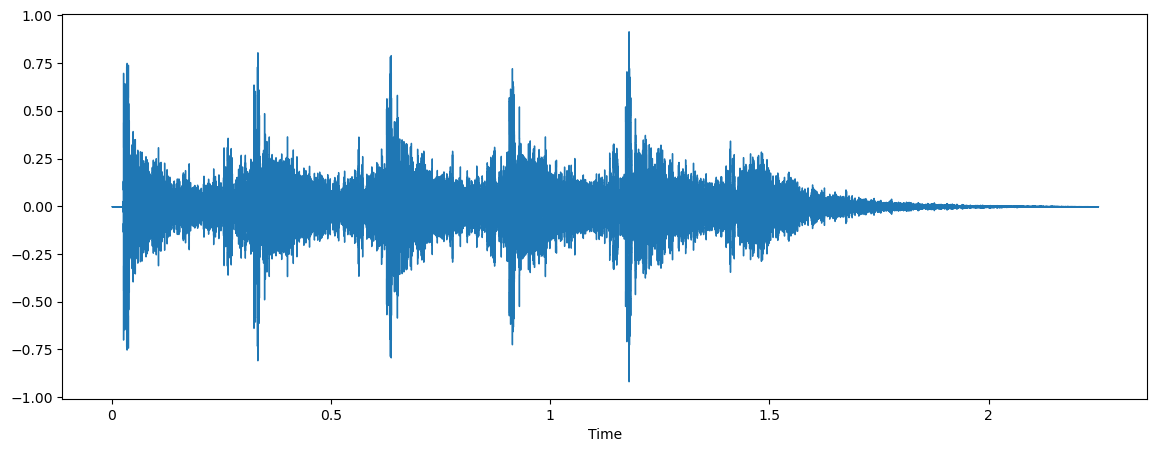

In [8]:
plt.figure(figsize=(14,5))
data,sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [9]:
sample_rate  # librosa converts everything into a mono channel

22050

In [13]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [14]:
wave_sample_rate

44100

In [15]:
wave_audio

array([[0, 0],
       [0, 0],
       [0, 0],
       ...,
       [1, 0],
       [1, 1],
       [0, 0]], dtype=int16)

In [16]:
data

array([-7.4505806e-09,  2.9802322e-08,  4.8428774e-08, ...,
        1.0127544e-05,  2.3271263e-05,  7.0009992e-06], dtype=float32)

In [17]:
import pandas as pd

metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')

In [18]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [19]:
### check whether the dataset is imbalanced

metadata['class'].value_counts()

class
dog_bark            1000
children_playing    1000
air_conditioner     1000
street_music        1000
engine_idling       1000
jackhammer          1000
drilling            1000
siren                929
car_horn             429
gun_shot             374
Name: count, dtype: int64

#### Audio Classification Data Preprocessing

In [20]:
import librosa
audio_file_path = 'UrbanSound8K/audio/fold3/6988-5-0-3.wav'
librosa_audio_data, librosa_sample_rate= librosa.load(audio_file_path)

In [21]:
print(librosa_audio_data)

[-0.5025788  -0.7330911  -0.63469875 ...  0.19002673  0.14900687
  0.14226592]


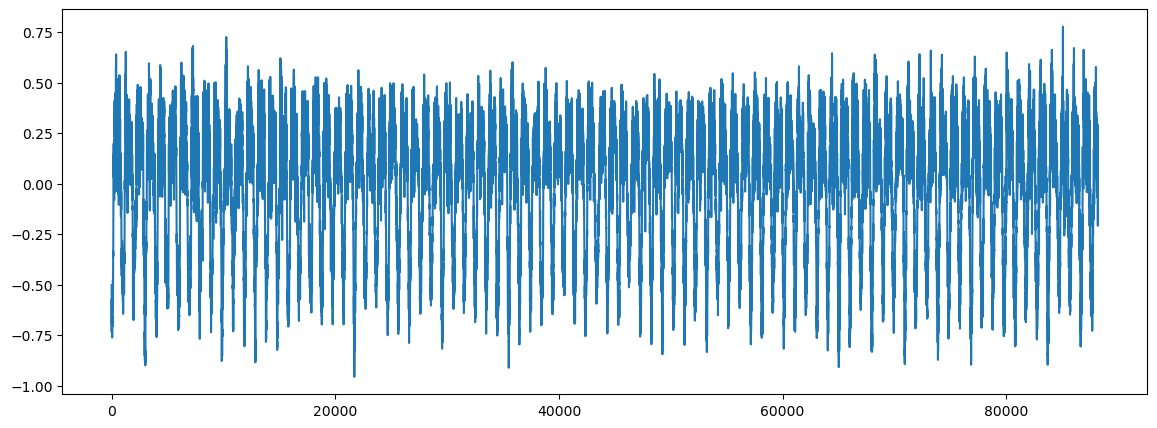

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(librosa_audio_data)

#### Observation

In [24]:
# Here Librosa converts the signal to mono, meaning the channel will always be 1

In [26]:
### Lets read with scipy
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(audio_file_path) 

In [27]:
wave_audio

array([[-21332, -23261],
       [-21135, -23440],
       [-20853, -23675],
       ...,
       [  3609,   5553],
       [  3623,   5119],
       [  3776,   5151]], dtype=int16)

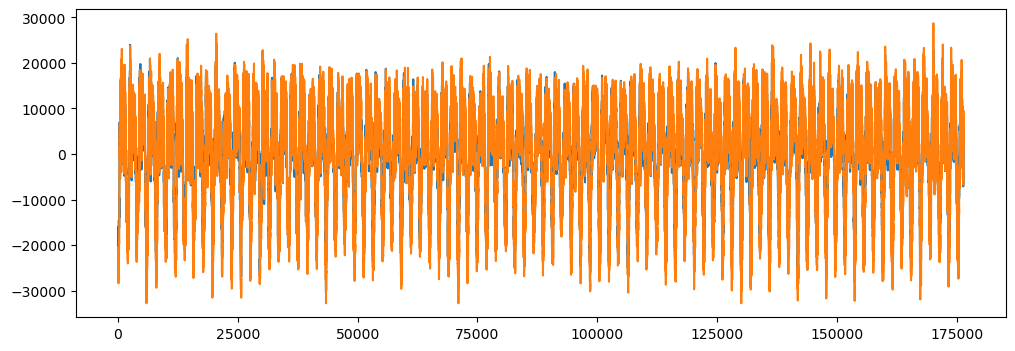

In [28]:
import matplotlib.pyplot as plt

# Original audio with 2 channels 
plt.figure(figsize=(12, 4))
plt.plot(wave_audio)

#### Extract Features

In [29]:
# Here we will be using Mel-Frequency Cepstral Coefficients(MFCC) from the audio samples. The MFCC summarises the frequency distribution across the window size, so it is possible to analyse both the frequency and time characteristics of the sound. These audio representations will allow us to identify features for classification.

In [30]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [31]:
mfccs

array([[-6.8388161e+01, -7.3425034e+01, -9.2049835e+01, ...,
        -8.5876747e+01, -8.2391006e+01, -8.7416954e+01],
       [ 1.2436899e+02,  1.4745334e+02,  1.6406967e+02, ...,
         1.6844672e+02,  1.5890938e+02,  1.4584236e+02],
       [ 6.9833940e-01, -1.3157434e+01, -2.7969656e+01, ...,
        -4.9139599e+01, -4.5604294e+01, -2.9129078e+01],
       ...,
       [ 3.8311865e+00,  4.8636228e-02,  1.8295286e+00, ...,
         5.4839640e+00,  6.3941441e+00,  8.0453472e+00],
       [ 4.4831002e-01,  3.2497563e+00,  1.4445057e+00, ...,
         4.9681611e+00,  5.7134974e-01,  3.2036922e+00],
       [ 1.4581232e+00,  6.0481892e+00, -2.5549346e-01, ...,
         1.6492350e+00,  4.1517496e+00,  6.2502394e+00]], dtype=float32)

In [32]:
#### Extracting MFCC's For every audio file
import pandas as pd
import os
import librosa

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [43]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='soxr_vhq')  # Changed res_type
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
    return mfccs_scaled_features

In [35]:
!pip install resampy

  Obtaining dependency information for resampy from https://files.pythonhosted.org/packages/4d/b9/3b00ac340a1aab3389ebcc52c779914a44aadf7b0cb7a3bf053195735607/resampy-0.4.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/3.1 MB ? eta -:--:--
    --------------------------------------- 0.0/3.1 MB 653.6 kB/s eta 0:00:05
    --------------------------------------- 0.1/3.1 MB 650.2 kB/s eta 0:00:05
   - -------------------------------------- 0.1/3.1 MB 871.5 kB/s eta 0:00:04
   - -------------------------------------- 0.1/3.1 MB 871.5 kB/s eta 0:00:04
   --- ------------------------------------ 0.2/3.1 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.3/3.1 MB 1.3 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.1 MB 1.3 MB/s eta 0:00:03
   ----- ---------------------------------- 0.4/3.1 MB 1.3 MB/s eta 0:00:03
   ------ --------------------------------- 0.5/3.1 MB 1.2 MB/s eta 0:00:03
   ------- -----------------------------

In [40]:
pip install --upgrade librosa resampy

Note: you may need to restart the kernel to use updated packages.


In [44]:
import numpy as np
import resampy
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

3554it [00:46, 70.77it/s] C:\Users\koner\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8323it [01:51, 96.68it/s] C:\Users\koner\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\koner\anaconda3\Lib\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [01:56, 74.65it/s] 


In [45]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-212.00314, 62.674824, -122.90673, -60.65173,...",dog_bark
1,"[-417.13693, 99.522896, -43.18181, 51.259483, ...",children_playing
2,"[-452.50336, 112.5184, -37.733913, 43.351658, ...",children_playing
3,"[-406.6045, 91.37373, -25.220646, 42.961544, 1...",children_playing
4,"[-439.7681, 104.045296, -42.84181, 50.873238, ...",children_playing


In [46]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [47]:
X.shape

(8732, 40)

In [48]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [49]:
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [50]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

(8732, 10)

In [52]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [53]:
X_train

array([[-1.2457774e+02,  1.0330147e+02, -1.3448149e+01, ...,
         4.8513741e+00, -3.0409386e+00,  4.4842458e+00],
       [-5.2539816e+00,  7.9210114e+01,  4.0002365e+00, ...,
        -3.2951066e+00, -5.3368373e+00, -1.4069886e+00],
       [-4.0504745e+01, -1.2952583e+01, -7.3664947e+00, ...,
         2.1373241e+00, -1.0122303e+00,  3.0362470e+00],
       ...,
       [-4.2666592e+02,  9.1565117e+01,  4.1780715e+00, ...,
         9.8541474e-01,  5.0465888e-01,  9.2592669e-01],
       [-1.3737848e+02,  1.2444741e+02, -2.1778589e+01, ...,
         1.4017974e+00, -2.0459971e+00, -7.5274801e-01],
       [-4.1839587e+02,  2.0687085e+02,  7.2278862e+00, ...,
        -3.9777384e+00, -4.7260981e+00, -2.7080047e-01]], dtype=float32)

In [54]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [55]:
X_train.shape

(6985, 40)

In [56]:
X_test.shape

(1747, 40)

In [57]:
y_train.shape

(6985, 10)

In [58]:
y_test.shape

(1747, 10)

#### Model Creation

In [59]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [61]:
### No of classes
num_labels=y.shape[1]

In [62]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

C:\Users\koner\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [63]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 100)                 │           4,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 200)                 │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 200)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          20,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 10)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 45,410 (177.38 KB)

 Trainable params: 45,410 (177.38 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [69]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 
import os

# Ensure the directory exists
os.makedirs('saved_models', exist_ok=True)

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(
    filepath='saved_models/audio_classification.keras',  # Changed to .keras
    verbose=1,
    save_best_only=True
)

start = datetime.now()

model.fit(
    X_train, y_train,
    batch_size=num_batch_size,
    epochs=num_epochs,
    validation_data=(X_test, y_test),
    callbacks=[checkpointer],
    verbose=1
)

duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
216/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1074 - loss: 23.5449
Epoch 1: val_loss improved from inf to 2.29359, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1074 - loss: 23.3216 - val_accuracy: 0.1156 - val_loss: 2.2936
Epoch 2/100
217/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0994 - loss: 2.6289
Epoch 2: val_loss improved from 2.29359 to 2.28174, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0995 - loss: 2.6270 - val_accuracy: 0.1156 - val_loss: 2.2817
Epoch 3/100
190/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1195 - loss: 2.3594
Epoch 3: val_loss improved from 2.28174 to 2.27510, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1187 - loss: 2.3571 - val_accuracy: 0.1156 - val_loss: 2.2751
Epoch 4/100
193/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0

Epoch 23/100
192/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2095 - loss: 2.0859
Epoch 23: val_loss improved from 1.99873 to 1.92103, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2107 - loss: 2.0829 - val_accuracy: 0.3268 - val_loss: 1.9210
Epoch 24/100
204/219 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.2338 - loss: 2.0544
Epoch 24: val_loss improved from 1.92103 to 1.81472, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2345 - loss: 2.0524 - val_accuracy: 0.3566 - val_loss: 1.8147
Epoch 25/100
194/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2650 - loss: 1.9734
Epoch 25: val_loss improved from 1.81472 to 1.75393, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2672 - loss: 1.9688 - val_accuracy: 0.3715 - val_loss: 1.7539
Epoch 26/100
194/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - 

Epoch 45/100
191/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6007 - loss: 1.2071
Epoch 45: val_loss improved from 1.07361 to 1.06240, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5991 - loss: 1.2093 - val_accuracy: 0.6588 - val_loss: 1.0624
Epoch 46/100
179/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5728 - loss: 1.2333
Epoch 46: val_loss improved from 1.06240 to 1.04785, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5744 - loss: 1.2327 - val_accuracy: 0.6617 - val_loss: 1.0479
Epoch 47/100
175/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5929 - loss: 1.1907
Epoch 47: val_loss improved from 1.04785 to 1.03276, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5923 - loss: 1.1944 - val_accuracy: 0.6674 - val_loss: 1.0328
Epoch 48/100
195/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - ac

Epoch 68/100
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6532 - loss: 1.0114
Epoch 68: val_loss did not improve from 0.86486
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6523 - loss: 1.0148 - val_accuracy: 0.7172 - val_loss: 0.8732
Epoch 69/100
198/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6521 - loss: 1.0260
Epoch 69: val_loss did not improve from 0.86486
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6520 - loss: 1.0288 - val_accuracy: 0.7115 - val_loss: 0.8799
Epoch 70/100
199/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6394 - loss: 1.0486
Epoch 70: val_loss improved from 0.86486 to 0.84743, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6402 - loss: 1.0482 - val_accuracy: 0.7333 - val_loss: 0.8474
Epoch 71/100
199/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6450 - loss: 1.0446
Epoch 71: val_loss improved from 0.84743 to 0.84106, saving model to saved_models/audio_clas

Epoch 92/100
193/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6773 - loss: 0.9589
Epoch 92: val_loss did not improve from 0.77195
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6775 - loss: 0.9601 - val_accuracy: 0.7567 - val_loss: 0.7759
Epoch 93/100
196/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6822 - loss: 0.9599
Epoch 93: val_loss did not improve from 0.77195
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6815 - loss: 0.9615 - val_accuracy: 0.7470 - val_loss: 0.7953
Epoch 94/100
195/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6718 - loss: 0.9708
Epoch 94: val_loss did not improve from 0.77195
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6729 - loss: 0.9716 - val_accuracy: 0.7539 - val_loss: 0.7744
Epoch 95/100
195/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6750 - loss: 0.9671
Epoch 95: val_loss improved from 0.77195 to 0.75405, saving model to saved_models/audio_classification.keras
219/219 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - a

In [70]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7716084718704224


In [72]:
X_test[1]

array([-4.6373328e+02, -2.4287734e+00, -3.0515844e+01,  3.1892689e+01,
       -1.1497847e+01, -2.2423349e+01,  2.6114979e+00, -1.9211308e+01,
       -1.8394520e+01,  4.8700614e+00, -2.6511034e+01, -2.1440584e+01,
       -6.3120353e-01, -1.0314333e+01, -1.3172539e+01, -8.4137478e+00,
       -5.9357662e+00,  7.8749685e+00,  1.5733031e+01,  2.0794353e+01,
        2.1848860e+01,  4.9087524e-01, -1.8524799e+01, -5.2081275e+00,
       -5.9885150e-01,  2.8658435e+00, -6.7336869e+00, -1.6570940e+01,
       -9.9518642e+00,  1.3003720e+01,  4.7164831e-01, -2.3728447e+01,
       -1.5434267e+01,  9.4527426e+00,  1.0124137e+01, -3.0721846e-01,
       -1.5627670e+00,  1.8022652e+01,  1.3506238e+01, -4.8332067e+00],
      dtype=float32)

In [74]:
import numpy as np

# Predict probabilities for each class
predictions = model.predict(X_test)

# Get the class with the highest probability
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[5 4 4 ... 1 2 5]


#### Testing Some Test Audio Data

Steps

Preprocess the new audio data

predict the classes

Invere transform your Predicted Label

In [80]:
filename = 'UrbanSound8K/audio/fold1/7061-6-0-0.wav'

# Load and preprocess audio
audio, sample_rate = librosa.load(filename, res_type='soxr_vhq') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)

# Reshape for model input
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Predict using the model
predictions = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = np.argmax(predictions, axis=1)
print(predicted_label)

# Convert numerical label to class name
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

[-159.03319       7.8955297   -43.991657    -11.018278     -3.70124
    4.9961286    -5.8011084    10.933862     11.54354      20.540741
   21.302507     17.483408     -1.4543939     1.5954782    -3.2083237
   10.375557      4.427968     -4.12502      -9.23275       2.3825428
    0.5450725    -1.9830143    -2.4131196     9.085878     -0.8015226
   -4.4466724    -1.3129249     9.410559     -2.1544776     0.97036207
    1.9274303    -0.864985     -2.5873039     7.3237243    -3.8009357
   -1.2236911     2.5994856    -1.6808063    -5.096267      3.1179652 ]
[[-159.03319       7.8955297   -43.991657    -11.018278     -3.70124
     4.9961286    -5.8011084    10.933862     11.54354      20.540741
    21.302507     17.483408     -1.4543939     1.5954782    -3.2083237
    10.375557      4.427968     -4.12502      -9.23275       2.3825428
     0.5450725    -1.9830143    -2.4131196     9.085878     -0.8015226
    -4.4466724    -1.3129249     9.410559     -2.1544776     0.97036207
     1.9274303  

In [79]:
filename = 'UrbanSound8K/audio/fold6/4912-3-0-0.wav'
# Load and preprocess audio
audio, sample_rate = librosa.load(filename, res_type='soxr_vhq') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

print(mfccs_scaled_features)

# Reshape for model input
mfccs_scaled_features = mfccs_scaled_features.reshape(1, -1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)

# Predict using the model
predictions = model.predict(mfccs_scaled_features)

# Get the class with the highest probability
predicted_label = np.argmax(predictions, axis=1)
print(predicted_label)

# Convert numerical label to class name
prediction_class = labelencoder.inverse_transform(predicted_label) 
print(prediction_class)

[-181.11304     184.87334     -31.518177    -33.04683     -23.80843
   -9.888478      3.5892684    -1.8131161   -11.706975     -0.70412624
   -2.3669567    21.768686     -1.3150465    12.017046     16.351679
    8.4762945    -6.881597      4.6471276    -7.050667     -2.9736953
   -2.143433      2.922465     -1.445724      9.538312     -1.4979388
    0.31234688    4.2327523    -3.757246      2.545409      3.887912
    0.23043665    3.8819294    -2.6540873    -3.6077552    -1.2399331
    1.7819849    -1.2463721     2.732123     -4.5740685    -4.2587256 ]
[[-181.11304     184.87334     -31.518177    -33.04683     -23.80843
    -9.888478      3.5892684    -1.8131161   -11.706975     -0.70412624
    -2.3669567    21.768686     -1.3150465    12.017046     16.351679
     8.4762945    -6.881597      4.6471276    -7.050667     -2.9736953
    -2.143433      2.922465     -1.445724      9.538312     -1.4979388
     0.31234688    4.2327523    -3.757246      2.545409      3.887912
     0.23043665   